In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.preprocessing import MinMaxScaler
import datetime 
import yfinance as yf
import tensorflow
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
np.random.seed(42)
tensorflow.random.set_seed(42)

In [2]:
# List of tickers
tickers = ['AAPL', 'NVDA', 'MSFT', 'INTC', 'TSLA', 'CSCO']

### Fetching Historical Data from yahoo finance API for the tickers

In [3]:
# Date range for historical data
start_date = "2019-01-01"
end_date = "2024-04-30"

# Create an empty list to store dataframes
dataframes = []

# Loop through each ticker, fetch the data, and add the company name
for ticker in tickers:
    ticker_data = yf.Ticker(ticker).history(start=start_date, end=end_date)
    ticker_data['Company'] = ticker
    dataframes.append(ticker_data)

# Combine all dataframes into a single dataframe
df_portfolio = pd.concat(dataframes)

In [4]:
df_portfolio

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2019-01-02 00:00:00-05:00,37.068639,38.016357,36.910685,37.793785,148158800,0.0,0.0,AAPL
2019-01-03 00:00:00-05:00,34.457637,34.874059,33.983779,34.029251,365248800,0.0,0.0,AAPL
2019-01-04 00:00:00-05:00,34.589247,35.551324,34.414543,35.481918,234428400,0.0,0.0,AAPL
2019-01-07 00:00:00-05:00,35.587218,35.618331,34.917115,35.402939,219111200,0.0,0.0,AAPL
2019-01-08 00:00:00-05:00,35.793049,36.333919,35.544155,36.077843,164101200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,48.139999,48.459999,48.060001,48.320000,16261700,0.0,0.0,CSCO
2024-04-24 00:00:00-04:00,48.049999,48.380001,47.919998,48.349998,14828500,0.0,0.0,CSCO
2024-04-25 00:00:00-04:00,48.779999,48.930000,47.849998,48.099998,18790900,0.0,0.0,CSCO


### Visualize the stock portfolio performance of holding for last 5 years

Text(0, 0.5, 'Closing Price (USD)')

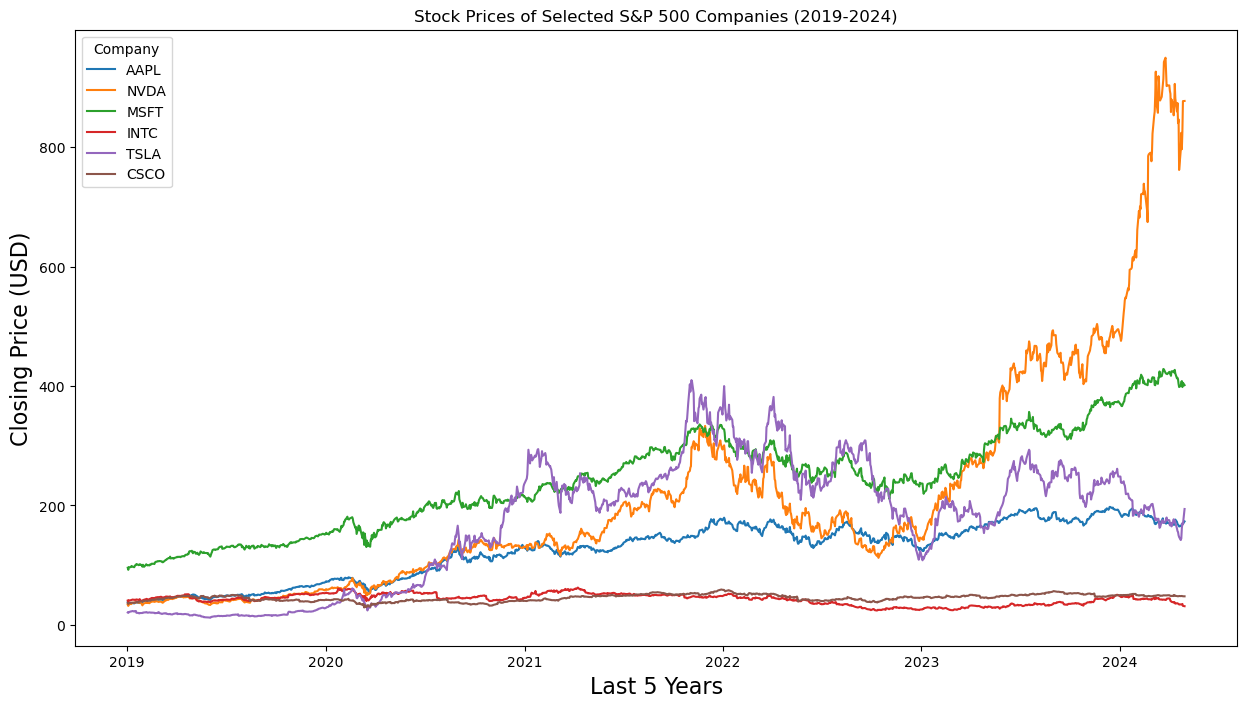

In [5]:
# Visualize the stock portfolio performance of holding
fig, visual_plot = plt.subplots(figsize=(15,8))
visual_plot = sns.lineplot(data =df_portfolio, x = df_portfolio.index, y= df_portfolio["Close"], hue = df_portfolio["Company"])
visual_plot.set_title("Stock Prices of Selected S&P 500 Companies (2019-2024)")
visual_plot.set_xlabel('Last 5 Years', fontsize=16)
visual_plot.set_ylabel('Closing Price (USD)' , fontsize=16)

### Create separate dataframe for each tickers

In [6]:
# Create a dictionary to store DataFrames for each stock ticker
ticker_dataframes = {}

# Loop through tickers and create a DataFrame for each ticker
for i, ticker in enumerate(tickers):
    ticker_dataframes[f'df_{i+1}'] = df_portfolio[df_portfolio['Company'] == ticker].copy()

# Display the first few rows of each ticker's DataFrame
for df_name, df in ticker_dataframes.items():
    print(f"Data for {df_name}:\n", df.head(), "\n")

Data for df_1:
                                 Open       High        Low      Close  \
Date                                                                    
2019-01-02 00:00:00-05:00  37.068639  38.016357  36.910685  37.793785   
2019-01-03 00:00:00-05:00  34.457637  34.874059  33.983779  34.029251   
2019-01-04 00:00:00-05:00  34.589247  35.551324  34.414543  35.481918   
2019-01-07 00:00:00-05:00  35.587218  35.618331  34.917115  35.402939   
2019-01-08 00:00:00-05:00  35.793049  36.333919  35.544155  36.077843   

                              Volume  Dividends  Stock Splits Company  
Date                                                                   
2019-01-02 00:00:00-05:00  148158800        0.0           0.0    AAPL  
2019-01-03 00:00:00-05:00  365248800        0.0           0.0    AAPL  
2019-01-04 00:00:00-05:00  234428400        0.0           0.0    AAPL  
2019-01-07 00:00:00-05:00  219111200        0.0           0.0    AAPL  
2019-01-08 00:00:00-05:00  164101200    

In [7]:
ticker_dataframes['df_1']

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
Date,,,,,,,,
2019-01-02 00:00:00-05:00,37.068639,38.016357,36.910685,37.793785,148158800,0.0,0.0,AAPL
2019-01-03 00:00:00-05:00,34.457637,34.874059,33.983779,34.029251,365248800,0.0,0.0,AAPL
2019-01-04 00:00:00-05:00,34.589247,35.551324,34.414543,35.481918,234428400,0.0,0.0,AAPL
2019-01-07 00:00:00-05:00,35.587218,35.618331,34.917115,35.402939,219111200,0.0,0.0,AAPL
2019-01-08 00:00:00-05:00,35.793049,36.333919,35.544155,36.077843,164101200,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...
2024-04-23 00:00:00-04:00,165.126031,166.823726,164.696606,166.673920,49537800,0.0,0.0,AAPL
2024-04-24 00:00:00-04:00,166.314410,169.070681,165.984870,168.791061,48251800,0.0,0.0,AAPL
2024-04-25 00:00:00-04:00,169.300369,170.378908,167.922233,169.659882,50558300,0.0,0.0,AAPL


### Defining functions to use only Close price of the stocks

In [8]:
# Define the function to retain only 'Close' prices
def close_prices_only(data):
    return data[['Close']]

# Create a dictionary to store DataFrames for close prices of each stock ticker
close_prices_dataframes = {}

# Loop through tickers and create a DataFrame for close prices for each ticker
for i, ticker in enumerate(tickers):
    close_prices_dataframes[f'df_close_{i+1}'] = close_prices_only(ticker_dataframes[f'df_{i+1}'])

# Display the first few rows of each close prices DataFrame
for df_name, df in close_prices_dataframes.items():
    print(f"Data for {df_name}:\n", df.head(), "\n")

Data for df_close_1:
                                Close
Date                                
2019-01-02 00:00:00-05:00  37.793785
2019-01-03 00:00:00-05:00  34.029251
2019-01-04 00:00:00-05:00  35.481918
2019-01-07 00:00:00-05:00  35.402939
2019-01-08 00:00:00-05:00  36.077843 

Data for df_close_2:
                                Close
Date                                
2019-01-02 00:00:00-05:00  33.788898
2019-01-03 00:00:00-05:00  31.747471
2019-01-04 00:00:00-05:00  33.781456
2019-01-07 00:00:00-05:00  35.569862
2019-01-08 00:00:00-05:00  34.684334 

Data for df_close_3:
                                Close
Date                                
2019-01-02 00:00:00-05:00  95.673439
2019-01-03 00:00:00-05:00  92.153831
2019-01-04 00:00:00-05:00  96.439819
2019-01-07 00:00:00-05:00  96.562820
2019-01-08 00:00:00-05:00  97.262962 

Data for df_close_4:
                                Close
Date                                
2019-01-02 00:00:00-05:00  40.775082
2019-01-03 00:00:0

In [9]:
## Function for scaling the data for LSTM

def min_max_scale(data):
    # Initialize MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit and transform the data using the scaler
    scaled_data = scaler.fit_transform(data.values)
    
    return scaler, scaled_data

In [10]:
# Scaling close prices for each stock ticker
df_scaler_1, df_scaled_1 = min_max_scale(close_prices_dataframes['df_close_1'])
df_scaler_2, df_scaled_2 = min_max_scale(close_prices_dataframes['df_close_2'])
df_scaler_3, df_scaled_3 = min_max_scale(close_prices_dataframes['df_close_3'])
df_scaler_4, df_scaled_4 = min_max_scale(close_prices_dataframes['df_close_4'])
df_scaler_5, df_scaled_5 = min_max_scale(close_prices_dataframes['df_close_5'])
df_scaler_6, df_scaled_6 = min_max_scale(close_prices_dataframes['df_close_6'])

In [11]:
def split_and_reshape_data(dataframe, pred_days):
    # Define the number of days to predict
    prediction_days = pred_days
    
    # Calculate the sizes of the training and testing sets
    train_size = int(np.ceil(len(dataframe) * 0.95))
    test_size = len(dataframe) - train_size
    
    # Split the data into training and testing sets
    train_data = dataframe[0: int(train_size), :]
    test_data = dataframe[train_size - prediction_days:, :]
    
    # Initialize lists to store features and target values for training and testing
    X_train, y_train, X_test, y_test = [], [], [], []
    
    # Generate sequences of features and target values for training set
    for i in range(prediction_days, len(train_data)):
        X_train.append(train_data[i - prediction_days: i, 0])
        y_train.append(train_data[i, 0])
        
    # Generate sequences of features and target values for testing set
    for i in range(prediction_days, len(test_data)):
        X_test.append(test_data[i - prediction_days: i, 0])
        y_test.append(test_data[i, 0])
        
    # Convert lists to numpy arrays
    X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)
    
    # Reshape the feature sets for LSTM input
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Return the prepared data
    return X_train, y_train, X_test, y_test

In [12]:
# Split and reshape data for each stock ticker
X1_train, y1_train, X1_test, y1_test = split_and_reshape_data(df_scaled_1, 30)
X2_train, y2_train, X2_test, y2_test = split_and_reshape_data(df_scaled_2, 30)
X3_train, y3_train, X3_test, y3_test = split_and_reshape_data(df_scaled_3, 30)
X4_train, y4_train, X4_test, y4_test = split_and_reshape_data(df_scaled_4, 30)
X5_train, y5_train, X5_test, y5_test = split_and_reshape_data(df_scaled_5, 30)
X6_train, y6_train, X6_test, y6_test = split_and_reshape_data(df_scaled_6, 30)

In [13]:
def lstm_model(X_train, y_train, epochs=100, batch_size=32):
    """
    Function to build and train an LSTM model for stock price prediction.
    
    Parameters:
    - X_train: numpy array, training features
    - y_train: numpy array, training labels
    - epochs: int, number of epochs for training (default: 100)
    - batch_size: int, batch size for training (default: 32)
    
    Returns:
    - model: trained Keras model
    """
    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    return model

In [14]:
# Build the LSTM model
model_lstm_1 = lstm_model(X1_train, y1_train)
model_lstm_2 = lstm_model(X2_train, y2_train)
model_lstm_3 = lstm_model(X3_train, y3_train)
model_lstm_4 = lstm_model(X4_train, y4_train)
model_lstm_5 = lstm_model(X5_train, y5_train)
model_lstm_6 = lstm_model(X6_train, y6_train)

2024-05-20 09:12:04.362147: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:12:04.362780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:12:04.363158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:12:05.424942: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:12:05.425622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:12:05.426051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:13:20.015649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:13:20.016268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:13:20.016781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:14:33.727355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:14:33.728019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:14:33.728408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:14:34.659823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:14:34.660434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:14:34.660900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:15:47.607553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:15:47.608260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:15:47.608775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:17:00.928857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:17:00.929323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:17:00.930029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:17:01.866208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:17:01.866843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:17:01.867324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2024-05-20 09:18:14.479726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:18:14.480545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:18:14.481106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [15]:
model_lstm_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [16]:
def predictions_inverse_scaler(scaler, model, X_test, y_test):
    """
    Function to inverse scale predicted and true values back to original scale.
    
    Parameters:
    - scaler: sklearn MinMaxScaler object, used for scaling the data
    - model: trained Keras model
    - X_test: numpy array, test features
    - y_test: numpy array, true test labels
    
    Returns:
    - y_pred: numpy array, inverse scaled predicted values
    - y_test: numpy array, inverse scaled true values
    """
    # Predictions using the model
    y_pred = model.predict(X_test)
    
    # Inverse scaling of predicted values
    y_pred = scaler.inverse_transform(y_pred)
    
    # Inverse scaling of true values
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    return y_pred, y_test

In [17]:
# Make predictions and inverse scale for each stock ticker
y1_pred, y1_test_inv = predictions_inverse_scaler(df_scaler_1, model_lstm_1, X1_test, y1_test)
y2_pred, y2_test_inv = predictions_inverse_scaler(df_scaler_2, model_lstm_2, X2_test, y2_test)
y3_pred, y3_test_inv = predictions_inverse_scaler(df_scaler_3, model_lstm_3, X3_test, y3_test)
y4_pred, y4_test_inv = predictions_inverse_scaler(df_scaler_4, model_lstm_4, X4_test, y4_test)
y5_pred, y5_test_inv = predictions_inverse_scaler(df_scaler_5, model_lstm_5, X5_test, y5_test)
y6_pred, y6_test_inv = predictions_inverse_scaler(df_scaler_6, model_lstm_6, X6_test, y6_test)

2024-05-20 09:19:29.367258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:29.367883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:29.368298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-20 09:19:29.581549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:29.582275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:29.582784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 6ms/step


2024-05-20 09:19:30.042353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:30.043091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:30.043704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 6ms/step


2024-05-20 09:19:30.500077: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:30.500817: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:30.501319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 6ms/step


2024-05-20 09:19:30.971129: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:30.971701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:30.972172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 5ms/step


2024-05-20 09:19:31.423228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:31.423947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:31.424447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 6ms/step


2024-05-20 09:19:31.878241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:31.878962: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:31.879423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
def plot_predictions(y_pred, y_true, ticker_label):
    """
    Function to plot predicted values against true values with ticker label.
    
    Parameters:
    - y_pred: numpy array, predicted values
    - y_true: numpy array, true values
    - ticker_label: str, label for the ticker
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label='True Values')
    plt.plot(y_pred, label='Predicted Values')
    plt.title(f'True vs Predicted Values for {ticker_label}')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

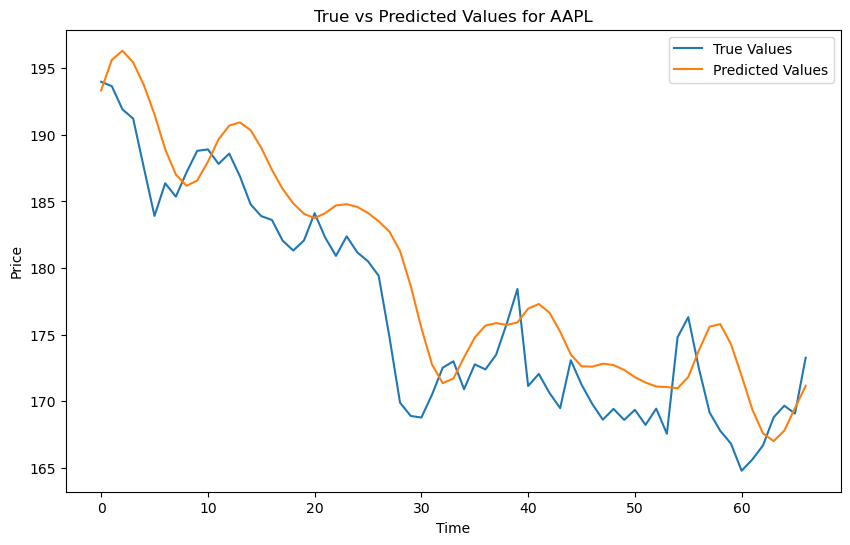

In [19]:
plot_predictions(y1_pred, y1_test_inv, tickers[0])

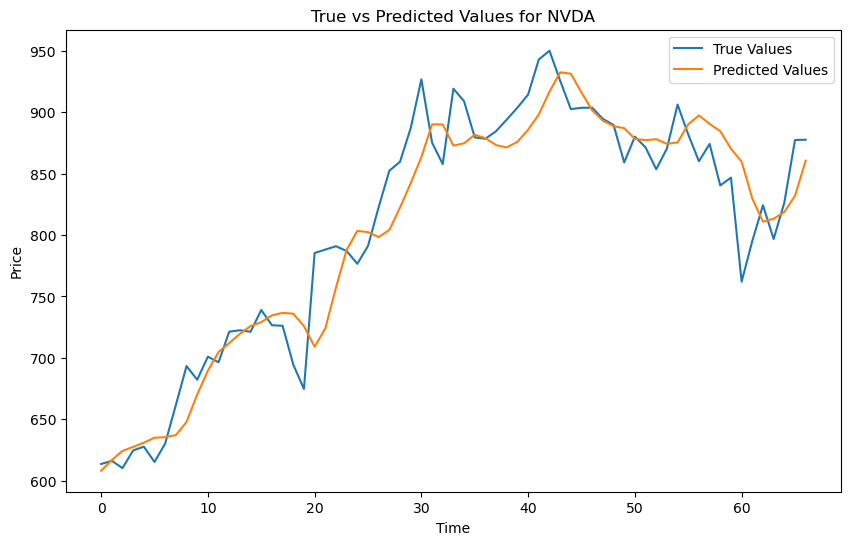

In [20]:
plot_predictions(y2_pred, y2_test_inv, tickers[1])

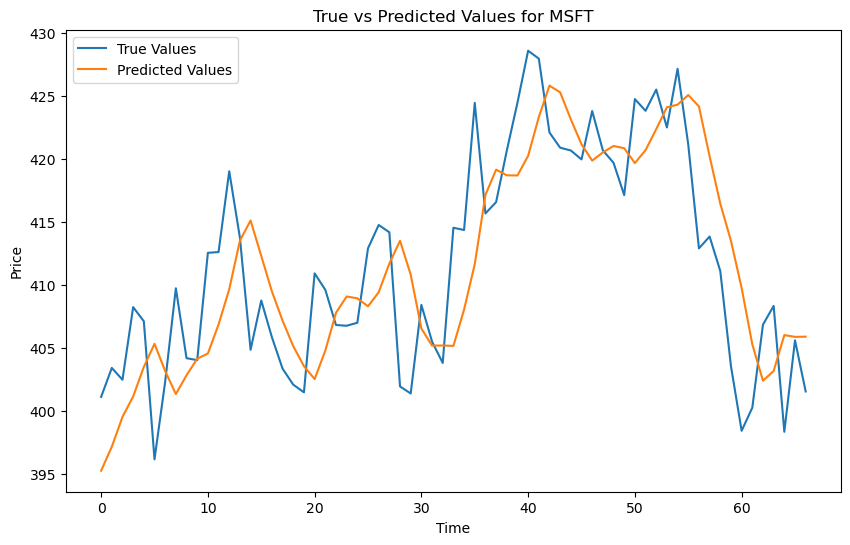

In [21]:
plot_predictions(y3_pred, y3_test_inv, tickers[2])

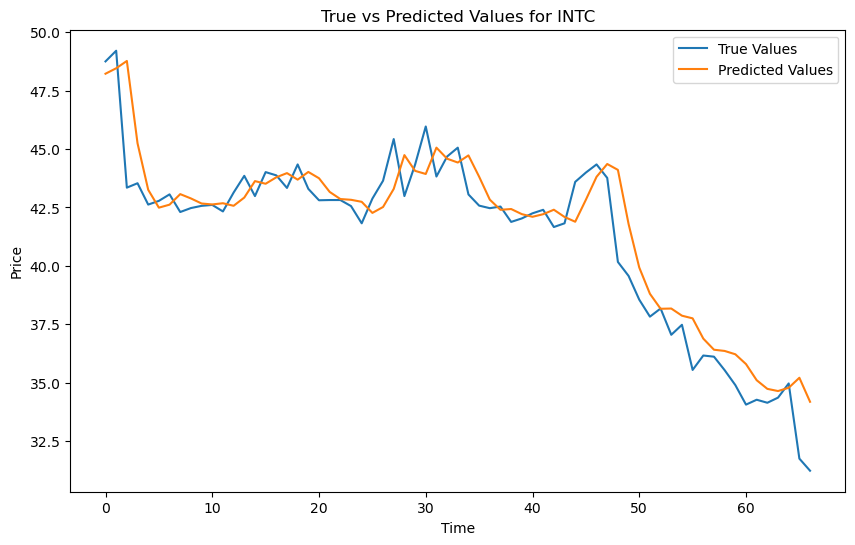

In [22]:
plot_predictions(y4_pred, y4_test_inv, tickers[3])

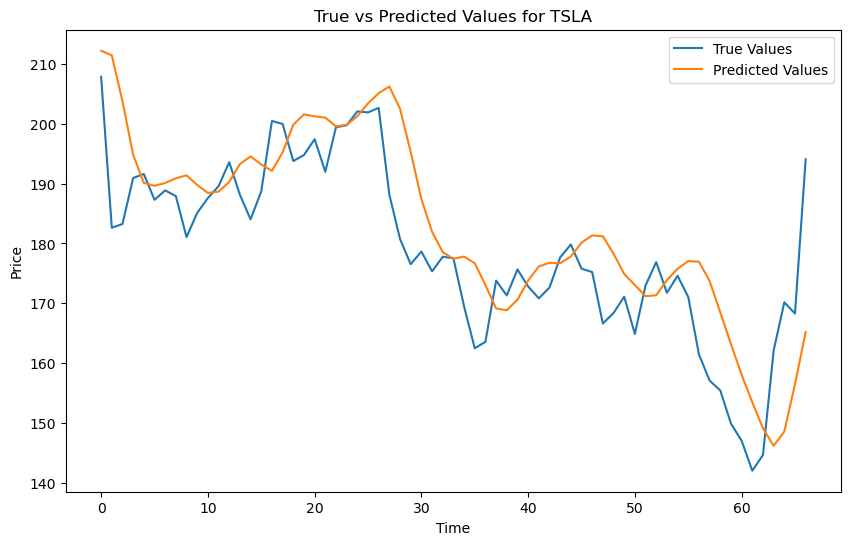

In [23]:
plot_predictions(y5_pred, y5_test_inv, tickers[4])

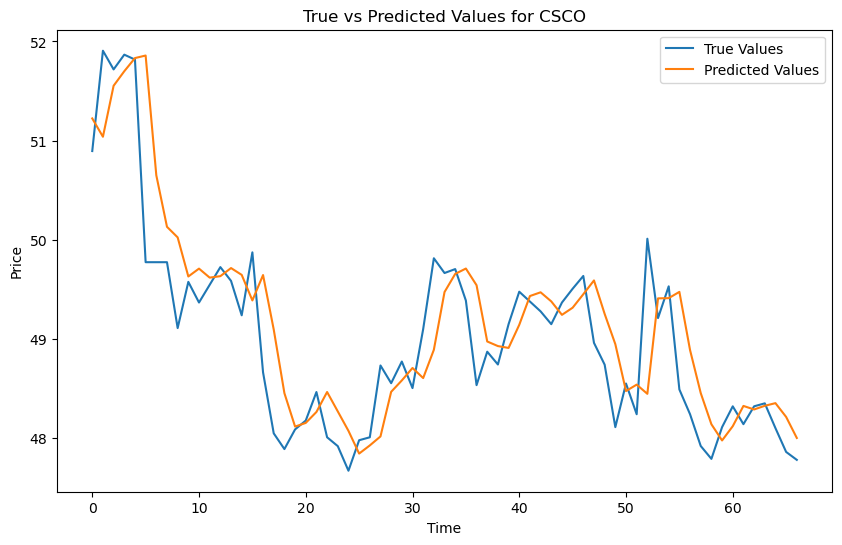

In [24]:
plot_predictions(y6_pred, y6_test_inv, tickers[5])

In [25]:
history_lstm_1 = model_lstm_1.fit(X1_train, y1_train, epochs = 100, batch_size = 32, validation_data = (X1_test, y1_test))
history_lstm_2 = model_lstm_2.fit(X2_train, y2_train, epochs = 100, batch_size = 32, validation_data = (X2_test, y2_test))
history_lstm_3 = model_lstm_3.fit(X3_train, y3_train, epochs = 100, batch_size = 32, validation_data = (X3_test, y3_test))
history_lstm_4 = model_lstm_4.fit(X4_train, y4_train, epochs = 100, batch_size = 32, validation_data = (X4_test, y4_test))
history_lstm_5 = model_lstm_5.fit(X5_train, y5_train, epochs = 100, batch_size = 32, validation_data = (X5_test, y5_test))
history_lstm_6 = model_lstm_6.fit(X6_train, y6_train, epochs = 100, batch_size = 32, validation_data = (X6_test, y6_test))

Epoch 1/100
37/39 [===========================>..] - ETA: 0s - loss: 0.0015

2024-05-20 09:19:33.307065: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:33.307996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:33.308446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 32ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0014

2024-05-20 09:19:33.532892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:19:33.533378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:19:33.534171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 20ms/step - loss: 0.0015 - val_loss: 3.7174e-04
Epoch 3/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 4.2955e-04
Epoch 4/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 5.9263e-04
Epoch 5/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0017 - val_loss: 4.1554e-04
Epoch 6/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0013 - val_loss: 4.8072e-04
Epoch 7/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0013 - val_loss: 3.8805e-04
Epoch 8/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 6.6267e-04
Epoch 9/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 3.9861e-04
Epoch 10/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0015 - val_loss: 7.1833e-04
Epoch 11/100
39/39 [==============================] - 1s 20ms/step - loss: 

39/39 [==============================] - 1s 22ms/step - loss: 0.0010 - val_loss: 2.4185e-04
Epoch 81/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 5.1924e-04
Epoch 82/100
39/39 [==============================] - 1s 20ms/step - loss: 9.7271e-04 - val_loss: 4.7562e-04
Epoch 83/100
39/39 [==============================] - 1s 20ms/step - loss: 9.9004e-04 - val_loss: 3.5395e-04
Epoch 84/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 2.3430e-04
Epoch 85/100
39/39 [==============================] - 1s 20ms/step - loss: 9.3561e-04 - val_loss: 2.2379e-04
Epoch 86/100
39/39 [==============================] - 1s 20ms/step - loss: 9.4453e-04 - val_loss: 2.0423e-04
Epoch 87/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 2.0733e-04
Epoch 88/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 2.5705e-04
Epoch 89/100
39/39 [==============================] 

2024-05-20 09:20:52.061165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:20:52.061882: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:20:52.062450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 32ms/step - loss: 2.9070e-04 - val_loss: 0.0034
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 5.4954e-04

2024-05-20 09:20:52.287392: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:20:52.287898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:20:52.288410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 20ms/step - loss: 3.1635e-04 - val_loss: 0.0045
Epoch 3/100
39/39 [==============================] - 1s 23ms/step - loss: 2.9593e-04 - val_loss: 0.0019
Epoch 4/100
39/39 [==============================] - 1s 20ms/step - loss: 3.5466e-04 - val_loss: 0.0039
Epoch 5/100
39/39 [==============================] - 1s 20ms/step - loss: 3.5761e-04 - val_loss: 0.0027
Epoch 6/100
39/39 [==============================] - 1s 20ms/step - loss: 3.4472e-04 - val_loss: 0.0058
Epoch 7/100
39/39 [==============================] - 1s 20ms/step - loss: 3.4418e-04 - val_loss: 0.0029
Epoch 8/100
39/39 [==============================] - 1s 20ms/step - loss: 2.9431e-04 - val_loss: 0.0033
Epoch 9/100
39/39 [==============================] - 1s 20ms/step - loss: 3.1095e-04 - val_loss: 0.0053
Epoch 10/100
39/39 [==============================] - 1s 20ms/step - loss: 3.5473e-04 - val_loss: 0.0014
Epoch 11/100
39/39 [==============================] - 1s 20ms/step - loss: 

39/39 [==============================] - 1s 18ms/step - loss: 2.8733e-04 - val_loss: 0.0053
Epoch 81/100
39/39 [==============================] - 1s 18ms/step - loss: 4.1342e-04 - val_loss: 0.0148
Epoch 82/100
39/39 [==============================] - 1s 18ms/step - loss: 2.6899e-04 - val_loss: 0.0064
Epoch 83/100
39/39 [==============================] - 1s 17ms/step - loss: 3.2449e-04 - val_loss: 0.0145
Epoch 84/100
39/39 [==============================] - 1s 17ms/step - loss: 3.0305e-04 - val_loss: 0.0111
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 2.9986e-04 - val_loss: 0.0181
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 3.0567e-04 - val_loss: 0.0073
Epoch 87/100
39/39 [==============================] - 1s 17ms/step - loss: 3.1187e-04 - val_loss: 0.0092
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 2.7878e-04 - val_loss: 0.0141
Epoch 89/100
39/39 [==============================] - 1s 17ms/step -

2024-05-20 09:22:06.286970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:22:06.287475: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:22:06.288012: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 8.6169e-04 - val_loss: 3.6481e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0014

2024-05-20 09:22:06.498417: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:22:06.498910: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:22:06.499380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 8.8508e-04 - val_loss: 0.0019
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 8.0028e-04 - val_loss: 3.7315e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 8.6339e-04 - val_loss: 2.9618e-04
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 8.9781e-04
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 7.8470e-04 - val_loss: 3.7457e-04
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 8.0261e-04 - val_loss: 3.3010e-04
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 7.6334e-04 - val_loss: 5.0323e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 8.1186e-04 - val_loss: 5.5195e-04
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 8.2413e-04 - val_loss: 3.7002e-04
Epoch 11/100
39/39 [===========================

Epoch 78/100
39/39 [==============================] - 1s 18ms/step - loss: 6.6055e-04 - val_loss: 5.2504e-04
Epoch 79/100
39/39 [==============================] - 1s 18ms/step - loss: 6.3927e-04 - val_loss: 3.4711e-04
Epoch 80/100
39/39 [==============================] - 1s 19ms/step - loss: 6.4274e-04 - val_loss: 2.6611e-04
Epoch 81/100
39/39 [==============================] - 1s 20ms/step - loss: 6.7628e-04 - val_loss: 0.0024
Epoch 82/100
39/39 [==============================] - 1s 20ms/step - loss: 6.3431e-04 - val_loss: 7.8364e-04
Epoch 83/100
39/39 [==============================] - 1s 20ms/step - loss: 6.2922e-04 - val_loss: 0.0016
Epoch 84/100
39/39 [==============================] - 1s 19ms/step - loss: 7.1480e-04 - val_loss: 5.4624e-04
Epoch 85/100
39/39 [==============================] - 1s 20ms/step - loss: 5.7862e-04 - val_loss: 2.3956e-04
Epoch 86/100
39/39 [==============================] - 1s 19ms/step - loss: 7.1314e-04 - val_loss: 3.4696e-04
Epoch 87/100
39/39 [=======

2024-05-20 09:23:17.188430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:23:17.188983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:23:17.189619: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0012

2024-05-20 09:23:17.400544: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:23:17.401054: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:23:17.401525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0020 - val_loss: 0.0010
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 12/1

39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 84/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 89/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 9.9363e-04
Epoch 90/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 91/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 92/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0010

2024-05-20 09:24:27.733388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:24:27.733892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:24:27.734426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 29ms/step - loss: 0.0013 - val_loss: 7.5225e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 6.6039e-04

2024-05-20 09:24:27.942567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:24:27.943133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:24:27.943678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 7.6549e-04
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 5.1961e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 7.6485e-04
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 5.0805e-04
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 6.0244e-04
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 6.3042e-04
Epoch 8/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 7.2786e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 5.9669e-04
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 6.0729e-04
Epoch 11/100
39/39 [==============================] - 1s 18ms/step - loss: 

39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 3.6839e-04
Epoch 81/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 4.3731e-04
Epoch 82/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 4.9194e-04
Epoch 83/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 3.7164e-04
Epoch 84/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 5.3754e-04
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 9.8755e-04 - val_loss: 4.1536e-04
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 4.5285e-04
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 3.8101e-04
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 5.3914e-04
Epoch 89/100
39/39 [==============================] - 1s 18ms/st

2024-05-20 09:25:37.922574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:25:37.923111: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:25:37.923764: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 30ms/step - loss: 0.0015 - val_loss: 3.8587e-04
Epoch 2/100
 1/39 [..............................] - ETA: 0s - loss: 0.0011

2024-05-20 09:25:38.135865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-20 09:25:38.136422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-20 09:25:38.136862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 3.0104e-04
Epoch 3/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 3.0318e-04
Epoch 4/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 3.8176e-04
Epoch 5/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 2.9676e-04
Epoch 6/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 3.2611e-04
Epoch 7/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 3.1922e-04
Epoch 8/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0013 - val_loss: 9.7966e-04
Epoch 9/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 3.1617e-04
Epoch 10/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 3.6757e-04
Epoch 11/100
39/39 [==============================] - 1s 19ms/step - loss: 

39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 2.8644e-04
Epoch 81/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 4.7154e-04
Epoch 82/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 3.0775e-04
Epoch 83/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 4.3996e-04
Epoch 84/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 3.5824e-04
Epoch 85/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 3.1603e-04
Epoch 86/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 2.8762e-04
Epoch 87/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 2.9661e-04
Epoch 88/100
39/39 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 5.1600e-04
Epoch 89/100
39/39 [==============================] - 1s 18ms/step -

In [26]:
def plot_training_error(history, ticker_label):
    """
    Function to plot training and validation error over epochs.
    
    Parameters:
    - history: Keras history object containing training history
    """
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Error for {ticker_label}')
    plt.legend()
    plt.show()

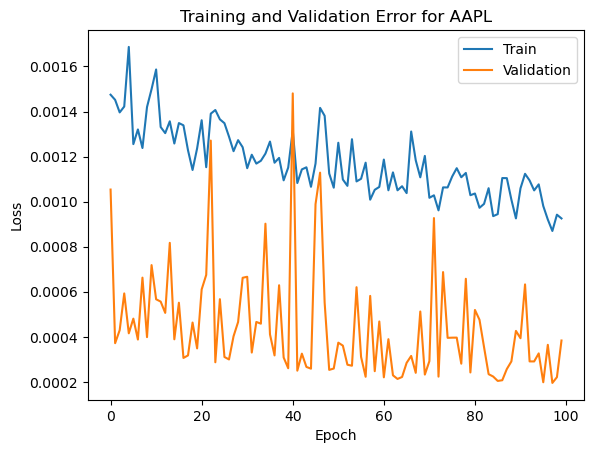

In [27]:
plot_training_error(history_lstm_1, tickers[0])

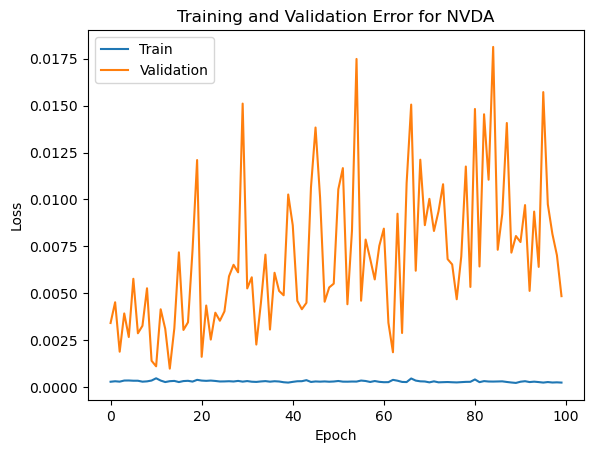

In [28]:
plot_training_error(history_lstm_2, tickers[1])

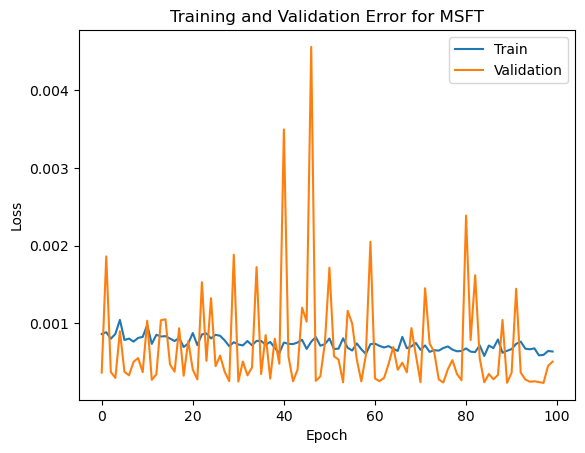

In [29]:
plot_training_error(history_lstm_3, tickers[2])

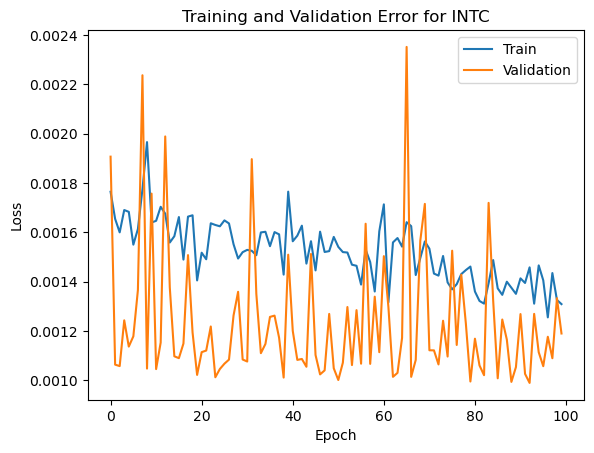

In [30]:
plot_training_error(history_lstm_4, tickers[3])

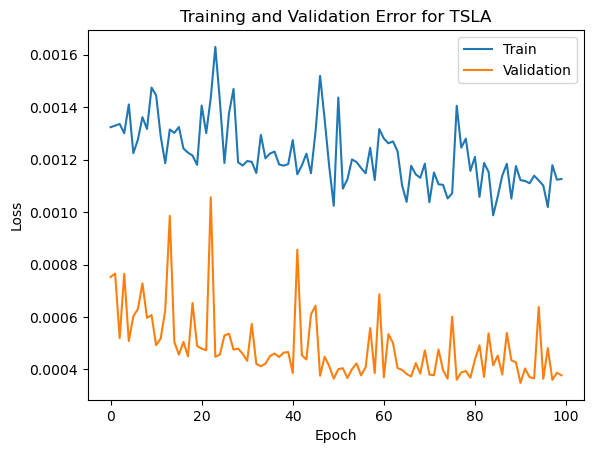

In [31]:
plot_training_error(history_lstm_5, tickers[4])

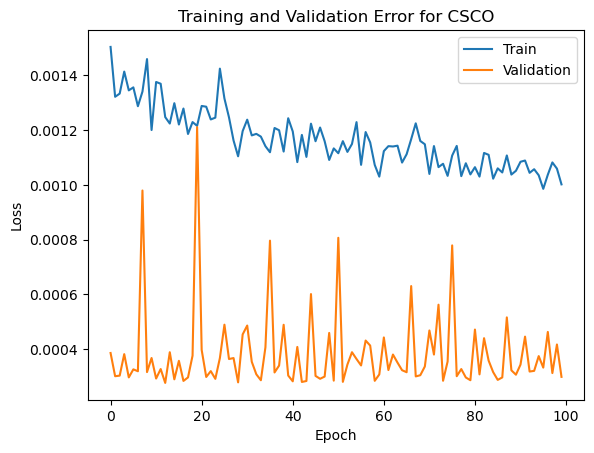

In [32]:
plot_training_error(history_lstm_6, tickers[5])

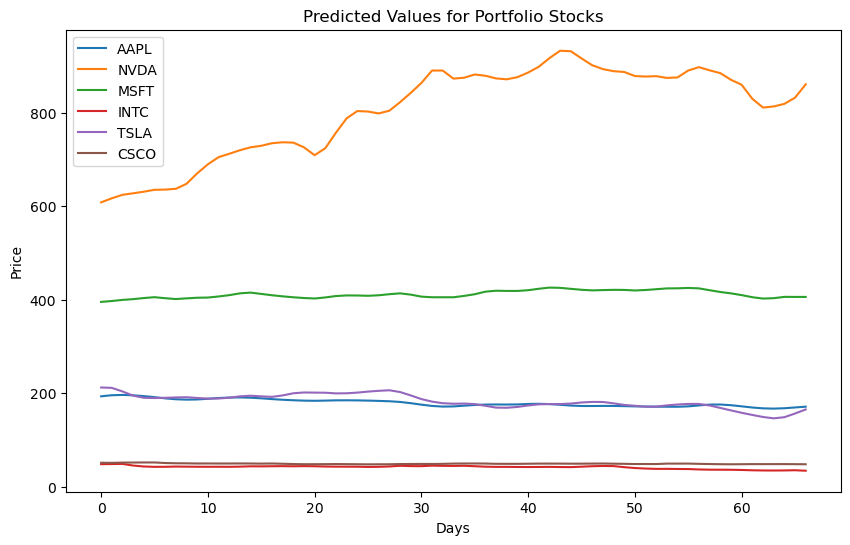

In [33]:
# Specify the tickers and their corresponding predicted values
tickers = ['AAPL', 'NVDA', 'MSFT', 'INTC', 'TSLA', 'CSCO']
y_pred_list = [y1_pred, y2_pred, y3_pred, y4_pred, y5_pred, y6_pred]

plt.figure(figsize=(10, 6))
for ticker_label, y_pred in zip(tickers, y_pred_list):
    plt.plot(y_pred, label=ticker_label)

plt.title('Predicted Values for Portfolio Stocks')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()